# Loan Approval 

________________________________________________________

This notebook is used to determine which customers are likely to commit fraud. 
As a data scientist for a banking organization, it is crucial that the bank possess knowledge of the clients who may or may not engage in fraud. I can distinguish between frauds and non-frauds using supervised machine learning classification techniques. 
With this knowledge, the financial company can avoid extending loans to borrowers who wouldn't be able to pay them back on time. They could also include more categories to help with the loan provisioning. The bank could then make exceptional provisions just for people who are at risk or have lower income.

 ________________________________________________________

URL for dataset: https://www.kaggle.com/datasets/yasserh/loan-default-dataset\
\
IMPORTANT! While exporting the jupyter notebook to .html, the graphs couldn't be attatched, hence you can see the black boxes. I will be saving the plots as .png files and importing them separately.

________________________________________________________

## Data Preprocessing

________________________________________________________

### Import libraries

In [24]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sn
import matplotlib.pyplot as plt
from PIL import Image as PILImage
import base64, io, IPython

Visualising the dataset in dataframe format

In [2]:
df = pd.read_csv("/Users/amulya/Documents/AI_ML/Loan_Default.csv")
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [3]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


I will now check if there are any unrecognisable values in columns of the dataset other than NaN values

In [4]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print(df[i].value_counts(),'\n')


ID
[ 24890  24891  24892 ... 173557 173558 173559]
24890     1
123979    1
123999    1
124000    1
124001    1
         ..
74447     1
74448     1
74449     1
74450     1
173559    1
Name: ID, Length: 148670, dtype: int64 

year
[2019]
2019    148670
Name: year, dtype: int64 

loan_limit
['cf' nan 'ncf']
cf     135348
ncf      9978
Name: loan_limit, dtype: int64 

Gender
['Sex Not Available' 'Male' 'Joint' 'Female']
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64 

approv_in_adv
['nopre' 'pre' nan]
nopre    124621
pre       23141
Name: approv_in_adv, dtype: int64 

loan_type
['type1' 'type2' 'type3']
type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64 

loan_purpose
['p1' 'p4' 'p3' 'p2' nan]
p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64 

Credit_Worthiness
['l1' 'l2']
l1    142344
l2      6326
Name: Credit_Worthiness, dtype: int64 

open_cr

The year column only has one value, so that isn't needed. The ID column are just numbers assigned to customers which can be dropped as well.


After expanding the values and investigating, it was found that there are some values missing, there are some categorical values and some numerical values but there were no unrecognisable elements.

In [5]:
df = df.drop('year',axis=1)
df = df.drop('ID',axis=1)

In [6]:
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


To prevent data leakage, I will split the dataset into test and train dataset and then preprocess it separately. All the models used to preprocess the train dataset would be used on the test dataset while calculating the performance of the model.

### Splitting the dataset

In [7]:
print('20% of dataset =',0.2*df.shape[0])
train_df = df[29734:148670]
test_df = df[:29734:]
#x = df.drop(['Status'],axis=1)
##add target values to y
#y = df["Status"]
print("Size of the entire dataset : ",df.shape)
print("Size of the training dataset : ",train_df.shape)
print("Size of the testing dataset : ",test_df.shape)

20% of dataset = 29734.0
Size of the entire dataset :  (148670, 32)
Size of the training dataset :  (118936, 32)
Size of the testing dataset :  (29734, 32)


________________________________________________________

## Preprocessing the Train Dataset

________________________________________________________

First I will convert the categorical values to numerical values

Storing all the categorical columns names into a list

In [8]:
str_col =[]
for i in train_df.columns:
    if np.dtype(train_df[i]) != 'float' :
        if np.dtype(train_df[i]) != 'int' :

            str_col.append(i)
            print(i)
print("\n Total numner of columns with categorical values = ",len(str_col))

loan_limit
Gender
approv_in_adv
loan_type
loan_purpose
Credit_Worthiness
open_credit
business_or_commercial
Neg_ammortization
interest_only
lump_sum_payment
construction_type
occupancy_type
Secured_by
total_units
credit_type
co-applicant_credit_type
age
submission_of_application
Region
Security_Type

 Total numner of columns with categorical values =  21


Label encode categorical values to numerical values

In [9]:
l1 = preprocessing.LabelEncoder()
l2 = preprocessing.LabelEncoder()
l3 = preprocessing.LabelEncoder()
l4 = preprocessing.LabelEncoder()
l5 = preprocessing.LabelEncoder()
l6 = preprocessing.LabelEncoder()
l7 = preprocessing.LabelEncoder()
l8 = preprocessing.LabelEncoder()
l9 = preprocessing.LabelEncoder()
l10 = preprocessing.LabelEncoder()
l11 = preprocessing.LabelEncoder()
l12 = preprocessing.LabelEncoder()
l13 = preprocessing.LabelEncoder()
l14 = preprocessing.LabelEncoder()
l15 = preprocessing.LabelEncoder()
l16 = preprocessing.LabelEncoder()
l17 = preprocessing.LabelEncoder()
l18 = preprocessing.LabelEncoder()
l19 = preprocessing.LabelEncoder()
l20 = preprocessing.LabelEncoder()
l21 = preprocessing.LabelEncoder()
lencode = [l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,l16,l17,l18,l19,l20,l21]

In [10]:
a = 0
for i in str_col:
    train_df.loc[:,i] = lencode[a].fit_transform(train_df[i])
    a = a+1

/var/folders/94/lw5vn4k53nj96dt1w75xpyxh0000gn/T/ipykernel_67943/773678258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,i] = lencode[a].fit_transform(train_df[i])
/var/folders/94/lw5vn4k53nj96dt1w75xpyxh0000gn/T/ipykernel_67943/773678258.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_df.loc[:,i] = lencode[a].fit_transform(train_df[i])


In [11]:
train_df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
29734,0,2,0,0,3,0,0,1,186500,3.750,...,0,749,0,3,1,94.191919,0,1,0,36.0
29735,2,1,0,0,3,0,0,1,286500,3.990,...,3,838,1,1,0,47.909699,3,1,0,38.0
29736,0,0,0,1,0,0,0,0,276500,4.250,...,1,831,0,1,0,92.785235,0,1,0,54.0
29737,0,3,0,0,3,0,0,1,216500,3.875,...,3,607,0,3,1,45.292887,3,1,0,29.0
29738,0,1,0,0,0,0,0,1,496500,NaN,...,2,584,1,0,0,NaN,0,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0,3,0,0,2,0,0,1,436500,3.125,...,0,659,1,3,1,71.792763,3,1,0,48.0
148666,0,2,0,0,0,0,0,1,586500,5.190,...,0,569,0,0,0,74.428934,3,1,0,15.0
148667,0,2,0,0,3,0,0,1,446500,3.125,...,0,702,1,2,0,61.332418,0,1,0,49.0
148668,0,0,0,0,3,0,0,1,196500,3.500,...,3,737,1,3,1,70.683453,0,1,0,29.0


Now I will find out how many columns have NaN values

In [12]:
train_df.isna().sum()

loan_limit                       0
Gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             29221
Interest_rate_spread         29388
Upfront_charges              31799
term                            30
Neg_ammortization                0
interest_only                    0
lump_sum_payment                 0
property_value               12076
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        7386
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                              0
submission_of_application        0
LTV                          12076
Region              

There are no missing values in the target values of the train dataset.

I will now check if there are columns with more than 50% of their data missing

In [13]:
for i in train_df.columns:
    if train_df[i].isna().sum() >= 0.5*train_df.shape[0]:
        print(i)

The KNN imputer will now be used to approximate the NaN values. I choose KNN imputer because it identifies the best acceptable value for the NaN value and calculates the Euclidian distance, making it more accurate than Simple Imputer, which just averages the values of that particular column. Due to the size of the dataset, I have set the n_neighbors number to 5.

In [14]:
knn_imp = KNNImputer(n_neighbors=5)
train_df_new = pd.DataFrame(knn_imp.fit_transform(train_df))
train_df_new.columns = train_df.columns

In [15]:
train_df_new

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0,186500.0,3.750,...,0.0,749.0,0.0,3.0,1.0,94.191919,0.0,1.0,0.0,36.0
1,2.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,286500.0,3.990,...,3.0,838.0,1.0,1.0,0.0,47.909699,3.0,1.0,0.0,38.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,276500.0,4.250,...,1.0,831.0,0.0,1.0,0.0,92.785235,0.0,1.0,0.0,54.0
3,0.0,3.0,0.0,0.0,3.0,0.0,0.0,1.0,216500.0,3.875,...,3.0,607.0,0.0,3.0,1.0,45.292887,3.0,1.0,0.0,29.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,496500.0,3.371,...,2.0,584.0,1.0,0.0,0.0,91.306932,0.0,1.0,1.0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118931,0.0,3.0,0.0,0.0,2.0,0.0,0.0,1.0,436500.0,3.125,...,0.0,659.0,1.0,3.0,1.0,71.792763,3.0,1.0,0.0,48.0
118932,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,586500.0,5.190,...,0.0,569.0,0.0,0.0,0.0,74.428934,3.0,1.0,0.0,15.0
118933,0.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0,446500.0,3.125,...,0.0,702.0,1.0,2.0,0.0,61.332418,0.0,1.0,0.0,49.0
118934,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,196500.0,3.500,...,3.0,737.0,1.0,3.0,1.0,70.683453,0.0,1.0,0.0,29.0


In [16]:
train_df_new.isna().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1                        0
dtype: i

I will now convert the encoded columns to int to retain their original value

In [17]:
for i in str_col:
    train_df_new[i] = train_df_new[i].astype(int)

In [18]:
train_df_new

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0,2,0,0,3,0,0,1,186500.0,3.750,...,0,749.0,0,3,1,94.191919,0,1,0.0,36.0
1,2,1,0,0,3,0,0,1,286500.0,3.990,...,3,838.0,1,1,0,47.909699,3,1,0.0,38.0
2,0,0,0,1,0,0,0,0,276500.0,4.250,...,1,831.0,0,1,0,92.785235,0,1,0.0,54.0
3,0,3,0,0,3,0,0,1,216500.0,3.875,...,3,607.0,0,3,1,45.292887,3,1,0.0,29.0
4,0,1,0,0,0,0,0,1,496500.0,3.371,...,2,584.0,1,0,0,91.306932,0,1,1.0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118931,0,3,0,0,2,0,0,1,436500.0,3.125,...,0,659.0,1,3,1,71.792763,3,1,0.0,48.0
118932,0,2,0,0,0,0,0,1,586500.0,5.190,...,0,569.0,0,0,0,74.428934,3,1,0.0,15.0
118933,0,2,0,0,3,0,0,1,446500.0,3.125,...,0,702.0,1,2,0,61.332418,0,1,0.0,49.0
118934,0,0,0,0,3,0,0,1,196500.0,3.500,...,3,737.0,1,3,1,70.683453,0,1,0.0,29.0


Now, I have split the train dataset into, features and target value

In [19]:
x_train= train_df_new.drop(['Status'],axis=1)
#add target values to y
y_train = train_df_new["Status"]

standardisation was performed, but there was no difference observed in the accuracy

In [ ]:
#from sklearn.preprocessing import StandardScaler
#std = StandardScaler()
#std.fit(x_train)

StandardScaler()

[1.11148877e-02 2.80010726e-02 1.22093797e-02 1.43376855e-02
 2.60307192e-02 8.30697328e-03 4.87265091e-04 9.78681973e-03
 3.90652449e-02 9.38299723e-02 6.84791761e-02 8.31750155e-02
 1.72521859e-02 2.47629953e-02 5.70091197e-03 2.89484211e-02
 3.82148977e-02 2.32609536e-04 1.02441512e-02 3.22860658e-04
 3.38317348e-03 3.78639476e-02 2.24485654e-01 3.07337282e-02
 2.63487586e-02 2.64801411e-02 2.03637154e-02 4.86624907e-02
 1.20845974e-02 2.22175171e-04 4.88683726e-02]


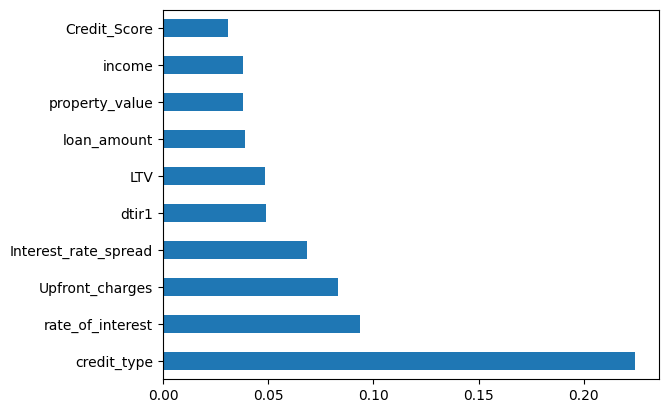

In [28]:
features = ExtraTreesClassifier()
features.fit(x_train,y_train)
print(features.feature_importances_)
feat_imp = pd.Series(features.feature_importances_, index=x_train.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

The ten features which have the most effect on the target values which is fraud or not fraud are plotted above in the graph. We can thus deduce that the feature - Credit Type has the maximum effect on the Status



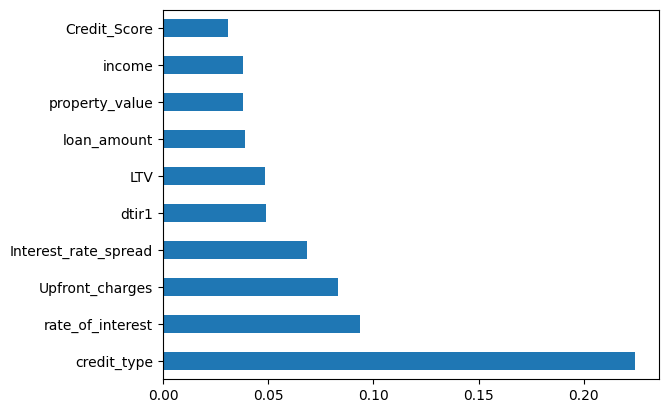

In [29]:
image0 = PILImage.open('/Users/amulya/Documents/AI_ML/feat.png')
output0 = io.BytesIO()
image0.save(output0, format='PNG')
encoded_string0 = base64.b64encode(output0.getvalue()).decode()
html0 = '<img src="data:image/png;base64,{}"/>'.format(encoded_string0)
IPython.display.HTML(html0)

________________________________________________________

# Training

________________________________________________________

## Alogorithm and Hyperparameter Tuning

For training, I will use three different algorithms to determine which one is the best algorithm to train the data for the classification problem

________________________________________________________

Logistic Regression

In [20]:
score_ = []
param = {'C':[1, 10],'solver':('liblinear','lbfgs','saga')}
model_lg = LogisticRegression(max_iter=5000)
grid = GridSearchCV(model_lg, param)
grid.fit(x_train,y_train)
print(grid.best_score_)
score_.append(grid.best_score_)
print(grid.best_params_)

0.7529091276695492
{'C': 1, 'solver': 'saga'}


________________________________________________________

Random Forest

In [21]:
param2 = {"max_depth":[15,30],"criterion":['log_loss','gini','entropy']}
model_dt = RandomForestClassifier(n_estimators=250)
grid2 = GridSearchCV(model_dt, param2)
grid2.fit(x_train,y_train)
print(grid2.best_score_)
score_.append(grid2.best_score_)
print(grid2.best_params_)

0.9517387428160647
{'criterion': 'gini', 'max_depth': 30}


________________________________________________________

KNN

In [22]:
param3 = {'algorithm':('auto', 'ball_tree', "kd_tree","brute"),'n_neighbors':[10,5]}
model_knn = KNeighborsClassifier()
grid3 = GridSearchCV(model_knn, param3)
grid3.fit(x_train,y_train)
print(grid3.best_score_)
score_.append(grid3.best_score_)
print(grid3.best_params_)

0.7945197420758692
{'algorithm': 'auto', 'n_neighbors': 5}


________________________________________________________

Plotting a comparision between the three algorithms on the basis of their accuracy

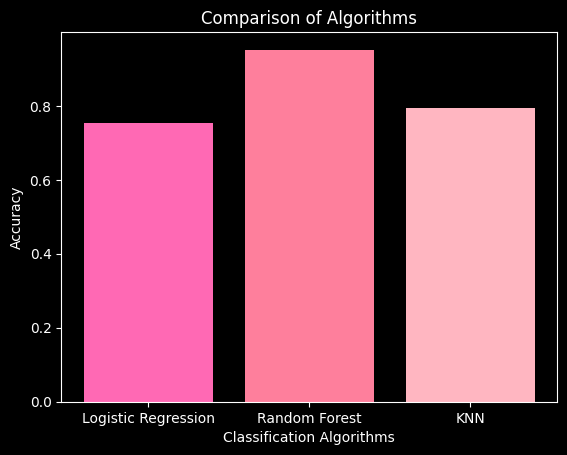

In [30]:
x=['Logistic Regression','Random Forest','KNN']
colours=['#FF69B4','#FE7F9C','#FFB6C1']
plt.bar(x,score_,color=colours)
plt.title('Comparison of Algorithms')
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy')

plt.show()



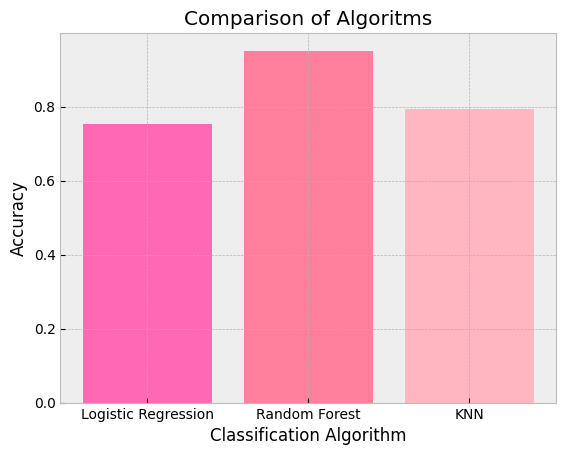

In [31]:

image1 = PILImage.open('/Users/amulya/Documents/AI_ML/1st.png')
output1 = io.BytesIO()
image1.save(output1, format='PNG')
encoded_string1 = base64.b64encode(output1.getvalue()).decode()
html1 = '<img src="data:image/png;base64,{}"/>'.format(encoded_string1)
IPython.display.HTML(html1)

Conclusion: Random Forest gives the best accuracy

________________________________________________________

## Preparing test dataset

The label encoding and imputation that was done on the train dataset, will be repeated on the test dataset

________________________________________________________

Label Encoding

In [32]:
a = 0
for i in str_col:
    test_df[i] = lencode[a].transform(test_df[i])
    a = a+1

/var/folders/94/lw5vn4k53nj96dt1w75xpyxh0000gn/T/ipykernel_67943/2259032522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[i] = lencode[a].transform(test_df[i])


In [33]:
test_df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0,3,0,0,0,0,0,1,116500,NaN,...,3,758,0,0,1,98.728814,3,1,1,45.0
1,0,2,0,1,0,0,0,0,206500,NaN,...,2,552,1,3,1,NaN,0,1,1,NaN
2,0,2,1,0,0,0,0,1,406500,4.560,...,3,834,0,1,1,80.019685,3,1,0,46.0
3,0,2,0,0,3,0,0,1,456500,4.250,...,3,587,0,2,0,69.376900,0,1,0,42.0
4,0,1,1,0,0,0,0,1,696500,4.000,...,1,602,1,0,0,91.886544,0,1,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29729,1,3,0,0,2,0,0,1,776500,3.750,...,1,789,0,2,1,73.393195,3,1,0,42.0
29730,0,2,0,0,0,0,0,1,226500,4.375,...,0,753,0,0,1,78.645833,3,1,0,40.0
29731,0,1,1,0,0,0,0,1,486500,4.500,...,3,549,1,3,1,93.918919,0,1,0,32.0
29732,0,2,0,2,2,0,0,1,106500,3.990,...,3,551,1,4,1,71.959459,0,1,0,42.0


Checking for NaN values

In [34]:
test_df.isna().sum()

loan_limit                      0
Gender                          0
approv_in_adv                   0
loan_type                       0
loan_purpose                    0
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest             7218
Interest_rate_spread         7251
Upfront_charges              7843
term                           11
Neg_ammortization               0
interest_only                   0
lump_sum_payment                0
property_value               3022
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                       1764
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                             0
submission_of_application       0
LTV                          3022
Region                          0
Security_Type 

Imputing the Test Dataframe

In [35]:
test_df_new = pd.DataFrame(knn_imp.transform(test_df))
test_df_new.columns = test_df.columns

Retaining information thus converting the encoded coumns to int data type

In [36]:
for i in str_col:
    test_df_new[i] = test_df_new[i].astype(int)

In [37]:
test_df_new

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0,3,0,0,0,0,0,1,116500.0,3.998,...,3,758.0,0,0,1,98.728814,3,1,1.0,45.0
1,0,2,0,1,0,0,0,0,206500.0,3.798,...,2,552.0,1,3,1,81.143893,0,1,1.0,34.0
2,0,2,1,0,0,0,0,1,406500.0,4.560,...,3,834.0,0,1,1,80.019685,3,1,0.0,46.0
3,0,2,0,0,3,0,0,1,456500.0,4.250,...,3,587.0,0,2,0,69.376900,0,1,0.0,42.0
4,0,1,1,0,0,0,0,1,696500.0,4.000,...,1,602.0,1,0,0,91.886544,0,1,0.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29729,1,3,0,0,2,0,0,1,776500.0,3.750,...,1,789.0,0,2,1,73.393195,3,1,0.0,42.0
29730,0,2,0,0,0,0,0,1,226500.0,4.375,...,0,753.0,0,0,1,78.645833,3,1,0.0,40.0
29731,0,1,1,0,0,0,0,1,486500.0,4.500,...,3,549.0,1,3,1,93.918919,0,1,0.0,32.0
29732,0,2,0,2,2,0,0,1,106500.0,3.990,...,3,551.0,1,4,1,71.959459,0,1,0.0,42.0


Splitting the test dataset into features and target value

In [38]:
x_test= test_df_new.drop(['Status'],axis=1)
#add target values to y
y_test = test_df_new["Status"]

________________________________________________________

Checking the accuracy of the model with the best accuracy, i.e the Random Forest model

In [39]:
y_predict = grid2.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.955404587341091

I will now visualise the trade-off between the bias and variance so check if the data was overfit or not

In [40]:
accuracy_score_test = []
accuracy_score_train = []

for depth in range(1,35):
    rf = RandomForestClassifier(criterion="log_loss", max_depth = depth,n_estimators=250)
    rf.fit(x_train,y_train)
    y_predict1 = rf.predict(x_test)
    y_predict2 = rf.predict(x_train)
    a = accuracy_score(y_test, y_predict1)
    b = accuracy_score(y_train, y_predict2)
    print("accuracy of test set of the model with max_depth =",depth, "is" ,a)
    print("accuracy of train set of the model with max_depth =",depth, "is" ,b)
    accuracy_score_test.append(a)
    accuracy_score_train.append(b) 

accuracy of test set of the model with max_depth = 1 is 0.7561377547588619
accuracy of train set of the model with max_depth = 1 is 0.752909127598036
accuracy of test set of the model with max_depth = 2 is 0.7568440169502926
accuracy of train set of the model with max_depth = 2 is 0.7538339947534809
accuracy of test set of the model with max_depth = 3 is 0.773659783412928
accuracy of train set of the model with max_depth = 3 is 0.77112060267707
accuracy of test set of the model with max_depth = 4 is 0.8287818658774467
accuracy of train set of the model with max_depth = 4 is 0.8272095917131903
accuracy of test set of the model with max_depth = 5 is 0.8480191027107016
accuracy of train set of the model with max_depth = 5 is 0.8472203538037264
accuracy of test set of the model with max_depth = 6 is 0.862985134862447
accuracy of train set of the model with max_depth = 6 is 0.8624638461021054
accuracy of test set of the model with max_depth = 7 is 0.878388376942221
accuracy of train set of 

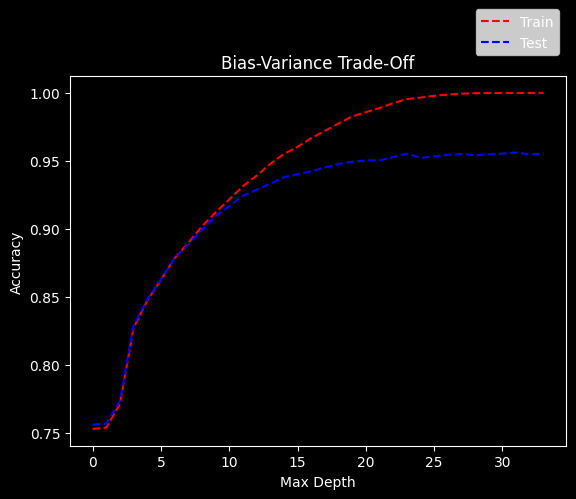

In [42]:
plt.title('Bias-Variance Trade-Off')
plt.plot(accuracy_score_train, 'r--' ,label='Train')
plt.plot(accuracy_score_test, 'b--' ,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend( fontsize =10, facecolor ='white',bbox_to_anchor=(1.0, 1.2)) 
plt.show()



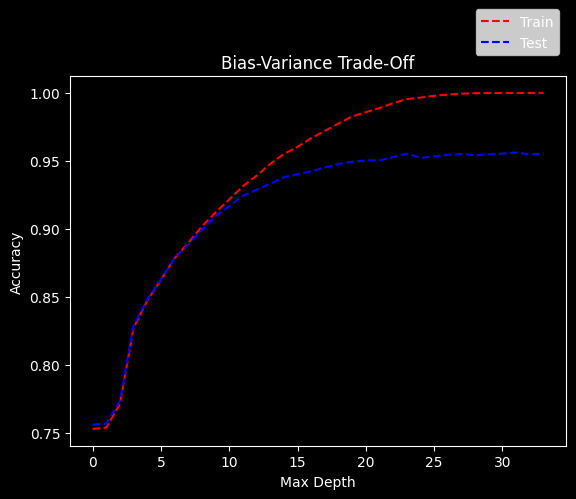

In [43]:

image2 = PILImage.open('/Users/amulya/Documents/AI_ML/2nd.png')
output2 = io.BytesIO()
image2.save(output2, format='PNG')
encoded_string2 = base64.b64encode(output2.getvalue()).decode()
html2 = '<img src="data:image/png;base64,{}"/>'.format(encoded_string2)
IPython.display.HTML(html2)


With a  higher bias, the model would not have fit the data adequately until the max-depth range of 5-10. This would lead to underfitting of the data.

________________________________________________________

The confusion matrix of a binary classification algorithm provides information about the Ture Positive[0,0], False Negative[0,1], False Positive[1,0] and True Negative[1,1]

<AxesSubplot: title={'center': 'Confusion Matrix'}>

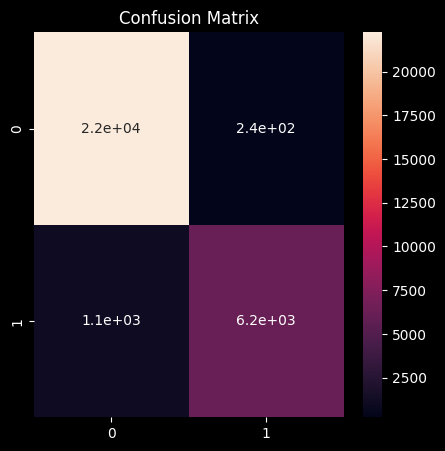

In [44]:
c_m=confusion_matrix(y_test,y_predict)
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix')
sn.heatmap(c_m, annot=True)


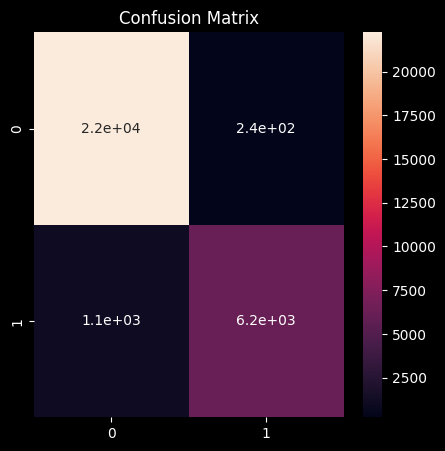

In [45]:

image3 = PILImage.open('/Users/amulya/Documents/AI_ML/3rd.png')
output3 = io.BytesIO()
image3.save(output3, format='PNG')
encoded_string3 = base64.b64encode(output3.getvalue()).decode()
html3 = '<img src="data:image/png;base64,{}"/>'.format(encoded_string3)
IPython.display.HTML(html3)

________________________________________________________

In [46]:

report = classification_report(y_test, y_predict, target_names=['Not Fraud','Fraud'])
print(report)

              precision    recall  f1-score   support

   Not Fraud       0.95      0.99      0.97     22483
       Fraud       0.96      0.85      0.90      7251

    accuracy                           0.96     29734
   macro avg       0.96      0.92      0.94     29734
weighted avg       0.96      0.96      0.95     29734



Precision: Total number of values that were expected to be in a
certain class were actually in that class.\
Recall: Total number of actual values in a class the model
accurately predicted.\
F1-Score: Weighted average of the precision and
recall value.\
Support: Total number of instances of the target value in the dataset

________________________________________________________

## Summary 
Now that we have a classification algorithm, we can forecast which customers will or won't commit fraud.\
\
When I compared other algorithms, I discovered that Random Forest performed classification with an accuracy of 0.9515.

________________________________________________________

Q: What are this solution's advantages?\
A: We can correctly forecast which customers shouldn't be provided loans using the supervised training method. This would save a lot of resources, money and time for the bank officials\

Recommendations:\
If the algorithm flags a deal as fraudulent, the bank should make additional arrangements to either double-check all the papers and features or to confirm the customer's credentials.

________________________________________________________